In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import defaultdict

In [48]:
DATA_DIR = "data_sets"

def get_editions():
    editions = []
    for fname in sorted(os.listdir(DATA_DIR)):
        if fname.endswith(".csv"):
            df = pd.read_csv(os.path.join(DATA_DIR, fname))
            editions.append((fname, df))
    return editions

def extract_date(filename):
    base = filename.replace(".csv", "")
    parts = base.split("_")
    return parts[-2] + "_" + parts[-1]

def get_areas():
    appearance_date = defaultdict(list)

    editions = get_editions()

    for fname, df in editions:
        areas = set(df["Application Area"].astype(str))

        for area in areas:
            if area not in appearance_date and area != "н/д":
                appearance_date[area] = extract_date(fname)
    
    appearance_df = pd.DataFrame([
        {"Application Area": area, "First appearance": date}
        for area, date in appearance_date.items()
    ])


    all_areas = set()
    for _, df in editions:
        all_areas.update(df["Application Area"].unique())
    all_areas.remove("н/д")
    result_dfs = dict()
    for area in all_areas:
        rows = []
        for filename, df in editions:
                count = (df["Application Area"] == area).sum()
                rows.append({"Date": extract_date(filename), "Count": count})
        
        result_dfs[area] = pd.DataFrame(rows)

    
    return appearance_df, result_dfs

In [49]:
def print_df_lines(df: pd.DataFrame, limit: int):
    print(df.head(limit).to_string(index=False))
    print()

In [50]:
def get_areas_by_system_count(df: pd.DataFrame, limit=3, order='desc'):
    if order == 'desc':
        grouped_by_area_df_count = df.groupby("Application Area")["ID"].count().reset_index(name='Count').sort_values(by="Count", ascending=False)
        print(f"=== Топ-{limit} области с наибольшим числом систем ===")
    elif order == 'asc':
        grouped_by_area_df_count = df.groupby("Application Area")["ID"].count().reset_index(name='Count').sort_values(by="Count", ascending=True)
        print(f"=== Топ-{limit} области с наименьшим числом систем ===")

    print_df_lines(grouped_by_area_df_count, limit)

In [51]:
def get_areas_by_system_performance(df: pd.DataFrame, limit=3, order='desc'):
    if order == 'desc':
        grouped_by_area_df_performance = df.groupby("Application Area")["Rmax"].sum().reset_index(name="Sum_Rmax").sort_values(by="Sum_Rmax", ascending=False)
        print(f"=== Топ-{limit} области с наибольшей концентрацией производительности ===")
    elif order == 'asc':
        grouped_by_area_df_performance = df.groupby("Application Area")["Rmax"].sum().reset_index(name="Sum_Rmax").sort_values(by="Sum_Rmax", ascending=True)
        print(f"=== Топ-{limit} области с наименьшей концентрацией производительности ===")
    
    print_df_lines(grouped_by_area_df_performance, limit)

In [52]:
def get_areas_by_first_appearance(df, limit=3, order='desc'):
    if order == 'desc':
        sorted_df = df.sort_values(by="First appearance", ascending=False)
        print(f"=== Топ-{limit} области новички ===")
    elif order == 'asc':
        sorted_df = df.sort_values(by="First appearance", ascending=True)
        print(f"=== Топ-{limit} области долгожители ===")
    
    print_df_lines(sorted_df, limit)

In [53]:
file_path = "data_sets/top50_export_2023_03.csv"

df = pd.read_csv(file_path)

get_areas_by_system_count(df, limit=3, order='desc')
get_areas_by_system_count(df, limit=3, order='asc')
get_areas_by_system_performance(df, limit=3, order='desc')
get_areas_by_system_performance(df, limit=3, order='asc')

appearance_areas, trend_dfs = get_areas()

get_areas_by_first_appearance(appearance_areas, limit=3, order='desc')
get_areas_by_first_appearance(appearance_areas, limit=3, order='asc')

=== Топ-3 области с наибольшим числом систем ===
   Application Area  Count
Наука и образование     26
       Исследования      7
        IT Services      4

=== Топ-3 области с наименьшим числом систем ===
  Application Area  Count
Seismic Processing      1
     Производитель      1
    Промышленность      1

=== Топ-3 области с наибольшей концентрацией производительности ===
   Application Area     Sum_Rmax
        IT Services 5.052090e+10
 Облачный провайдер 1.861900e+10
Наука и образование 1.001313e+10

=== Топ-3 области с наименьшей концентрацией производительности ===
  Application Area    Sum_Rmax
    Промышленность  97320000.0
     Производитель 119976000.0
Seismic Processing 147028500.0

=== Топ-3 области новички ===
       Application Area First appearance
     Облачный провайдер          2020_03
  Моделирование климата          2020_03
Искусственный интеллект          2019_04

=== Топ-3 области долгожители ===
   Application Area First appearance
     Промышленность         

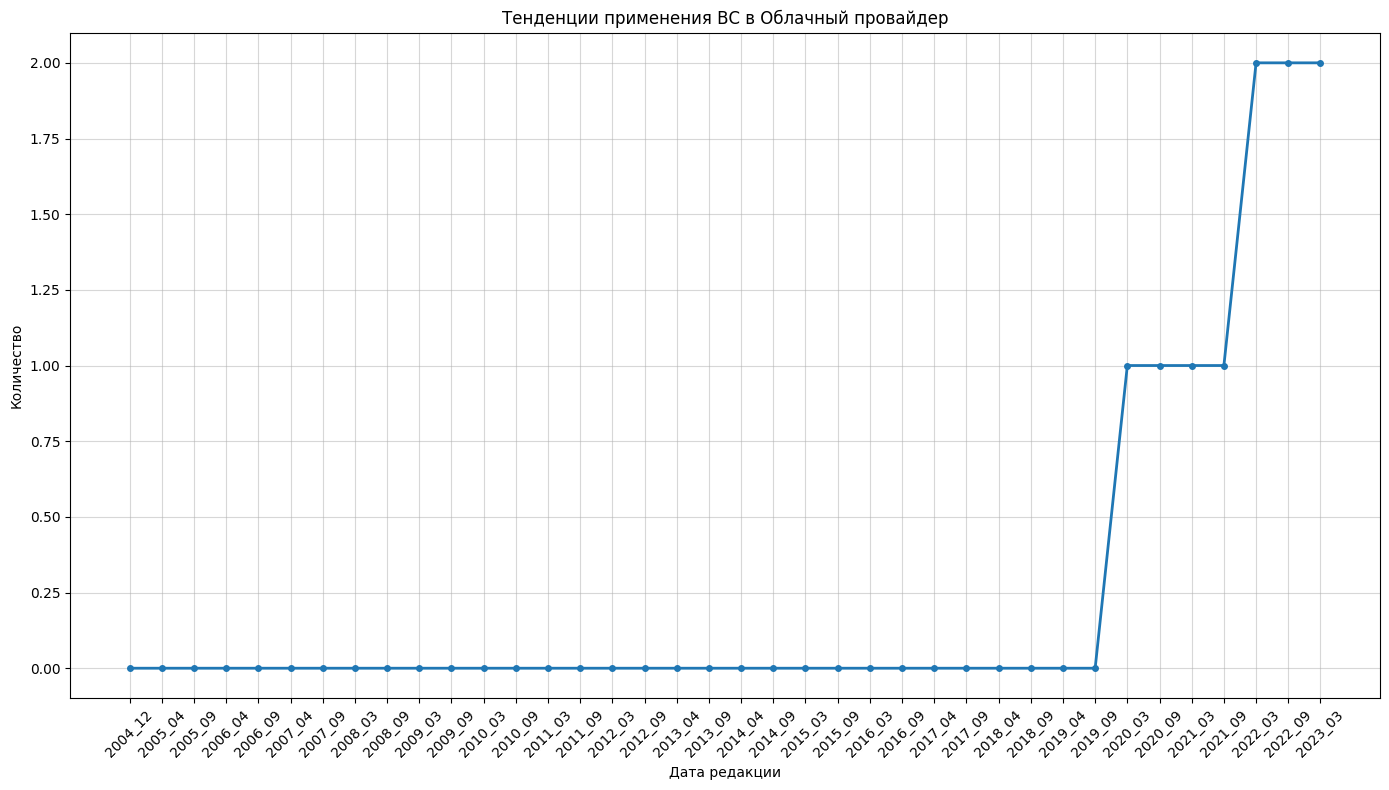

<Figure size 640x480 with 0 Axes>

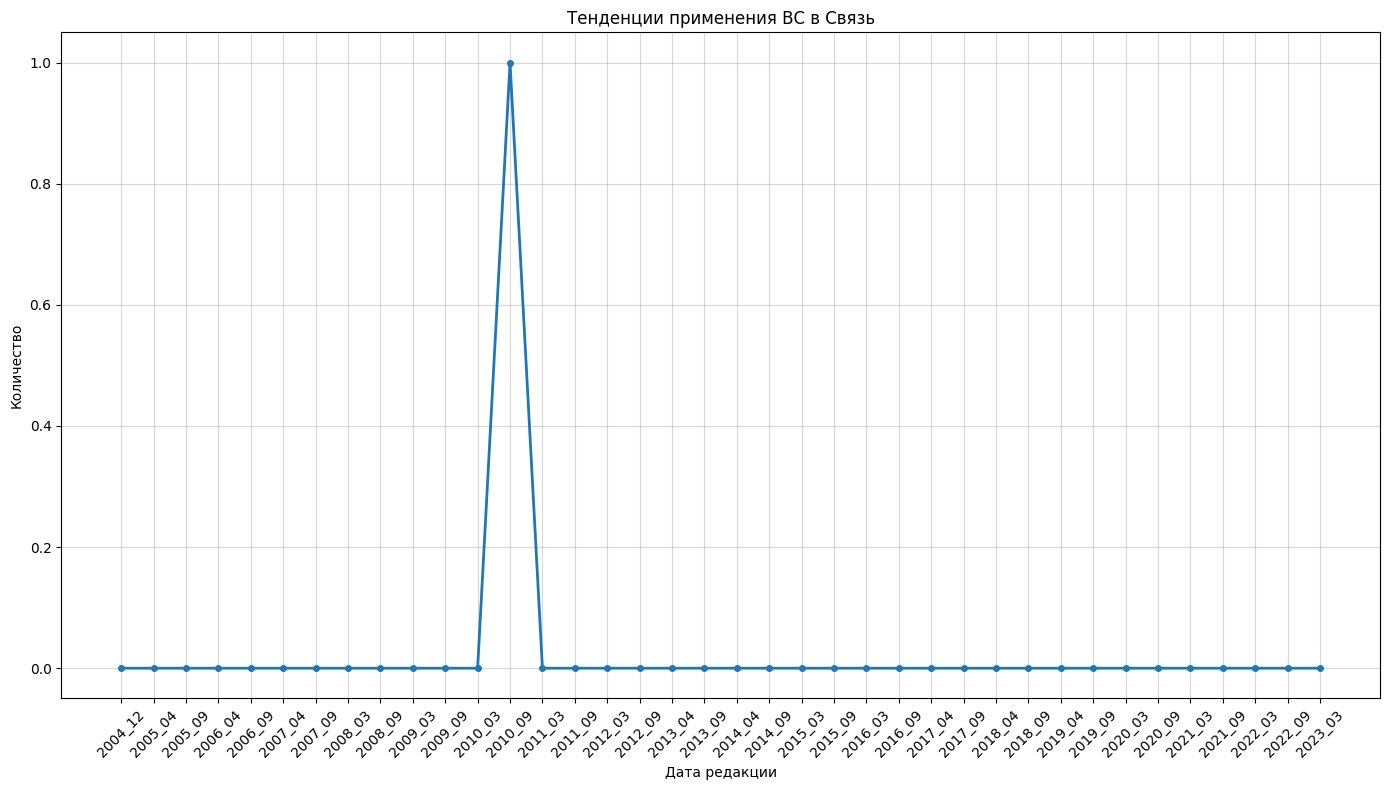

<Figure size 640x480 with 0 Axes>

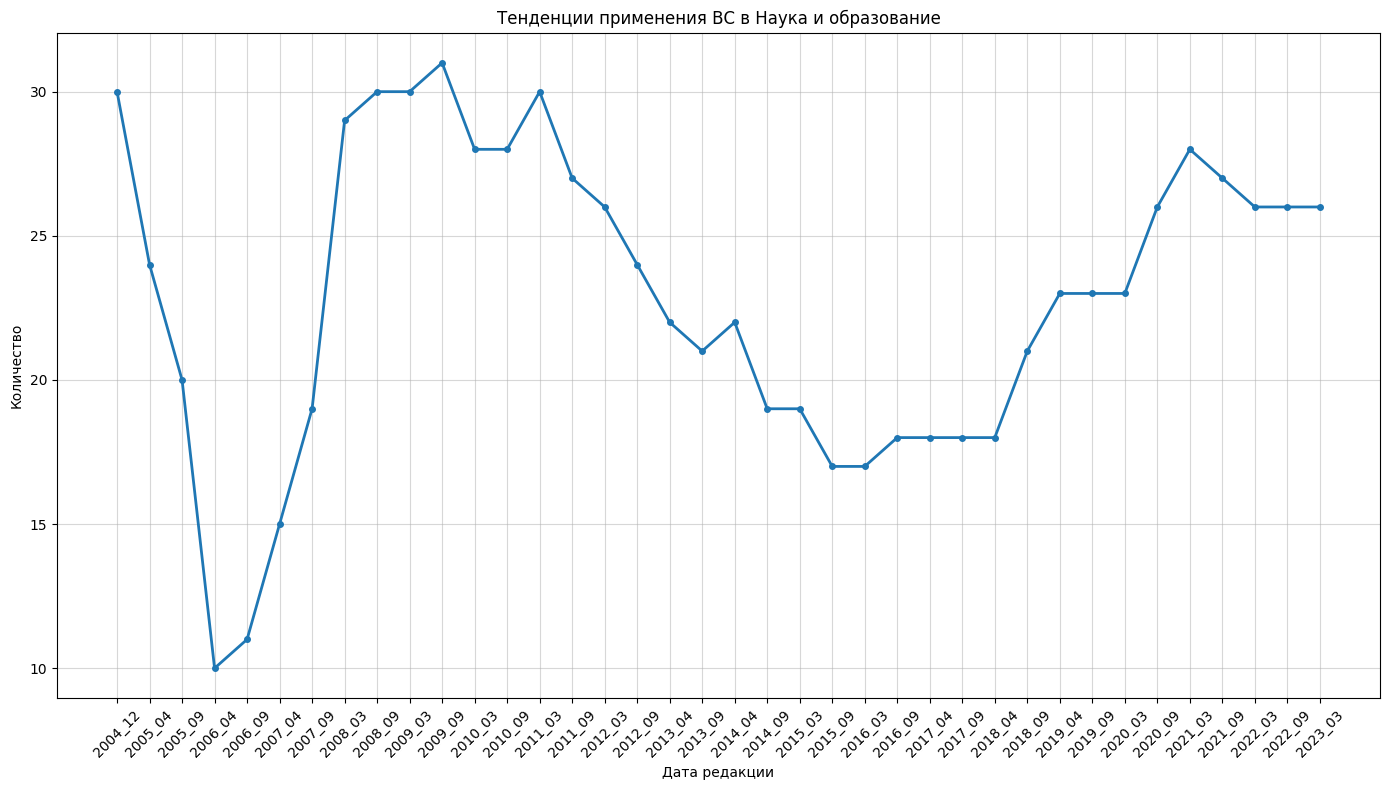

<Figure size 640x480 with 0 Axes>

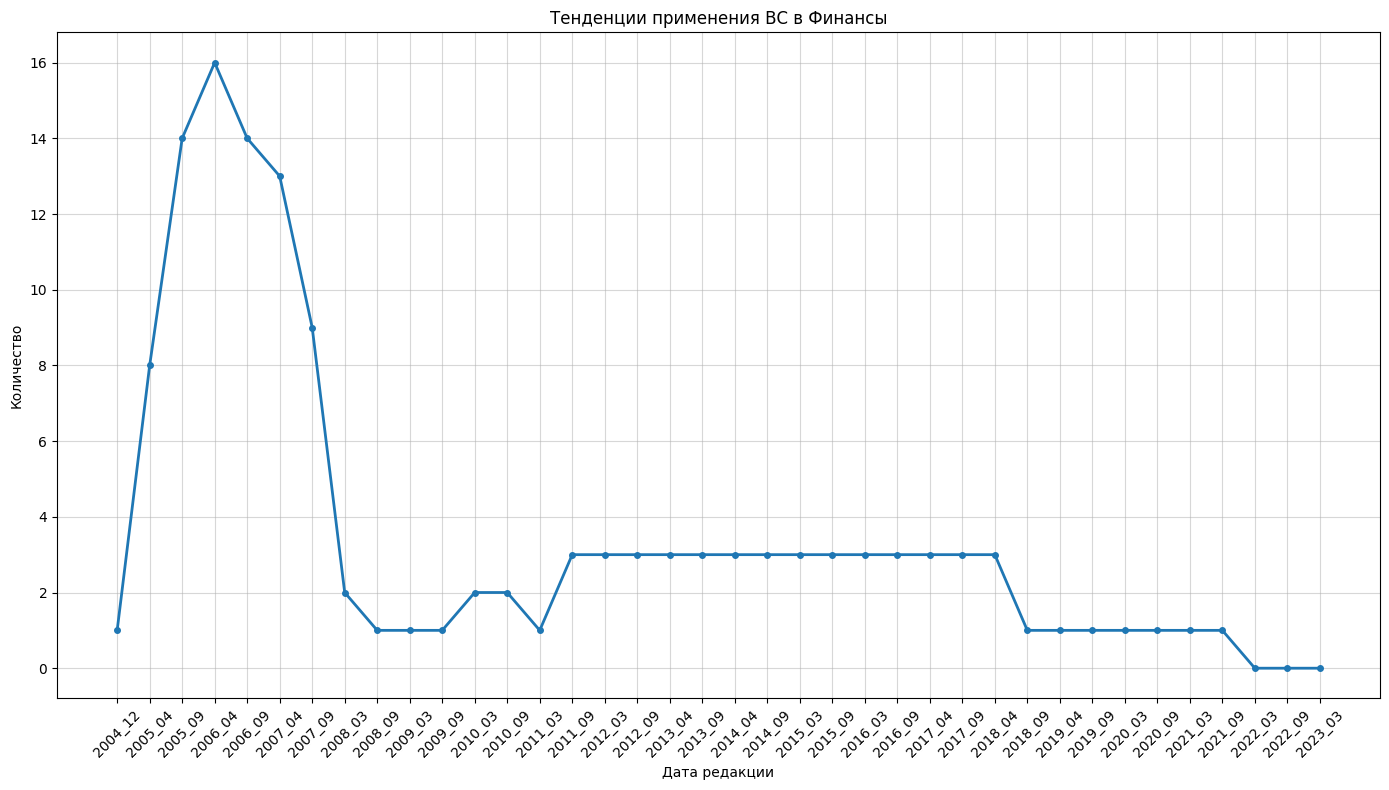

<Figure size 640x480 with 0 Axes>

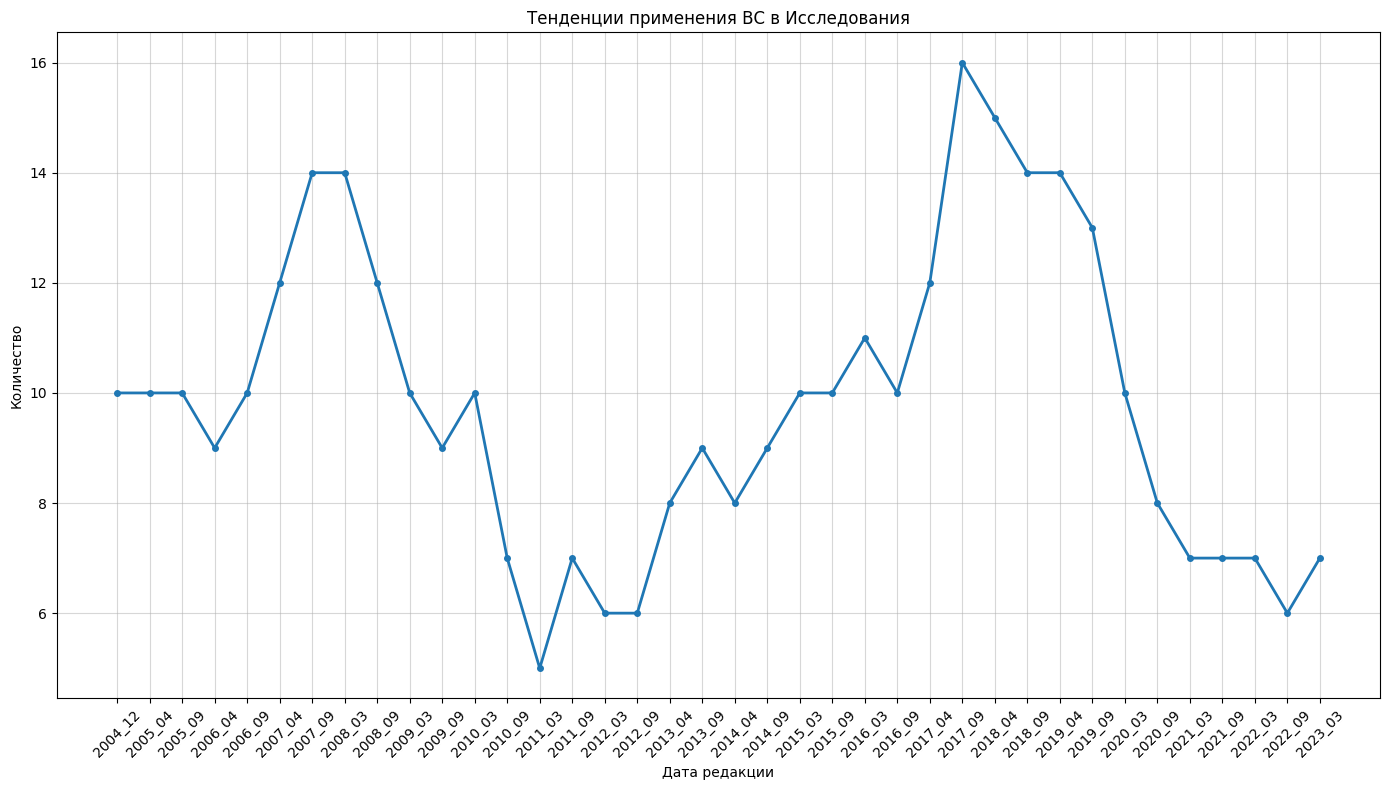

<Figure size 640x480 with 0 Axes>

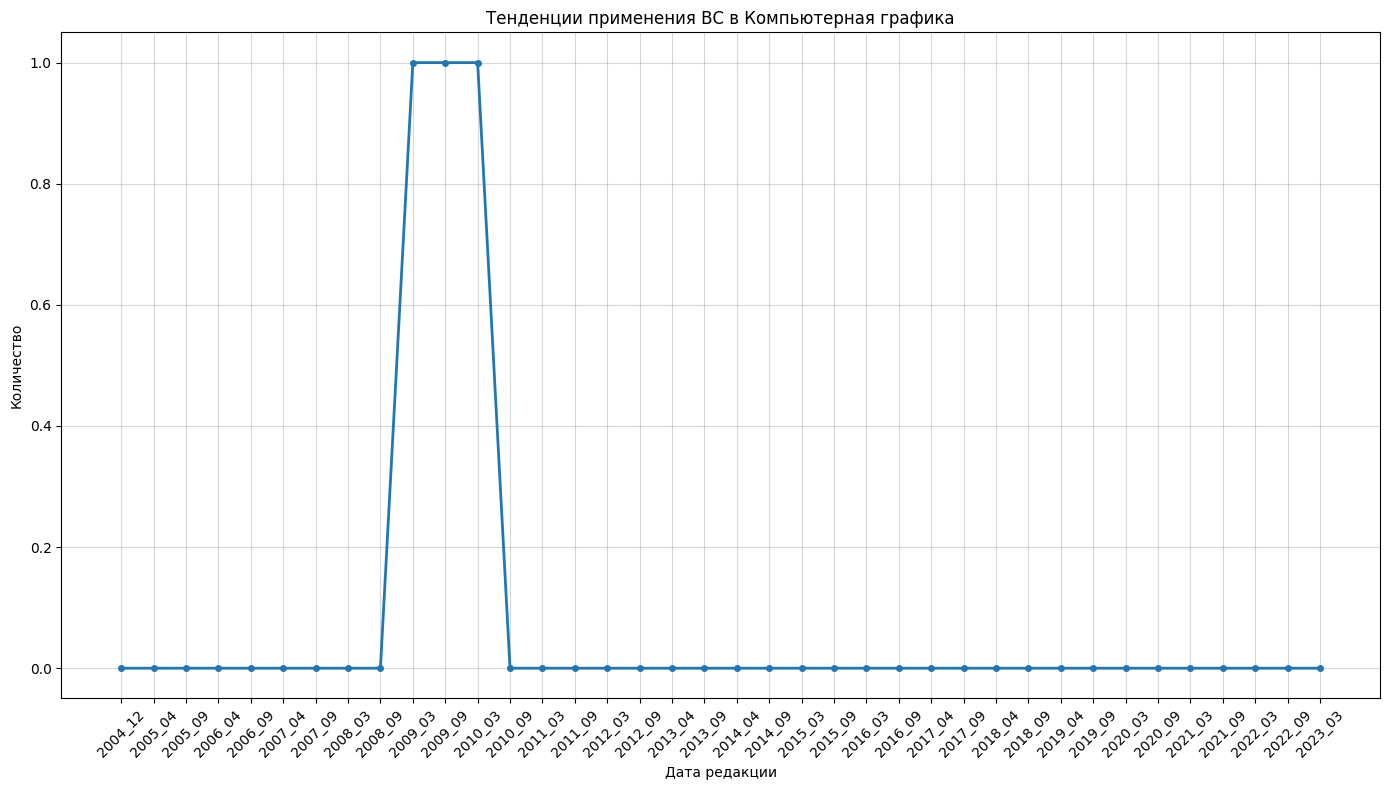

<Figure size 640x480 with 0 Axes>

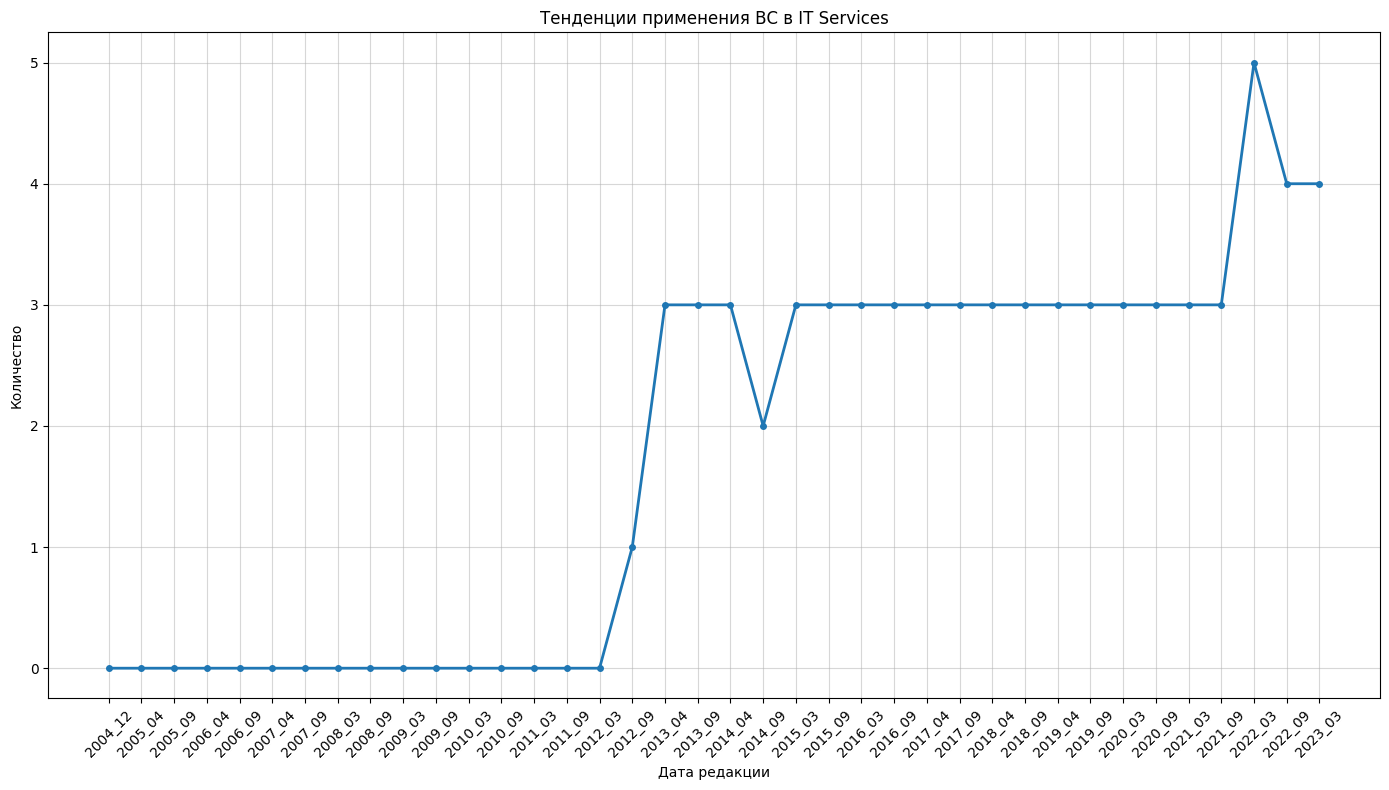

<Figure size 640x480 with 0 Axes>

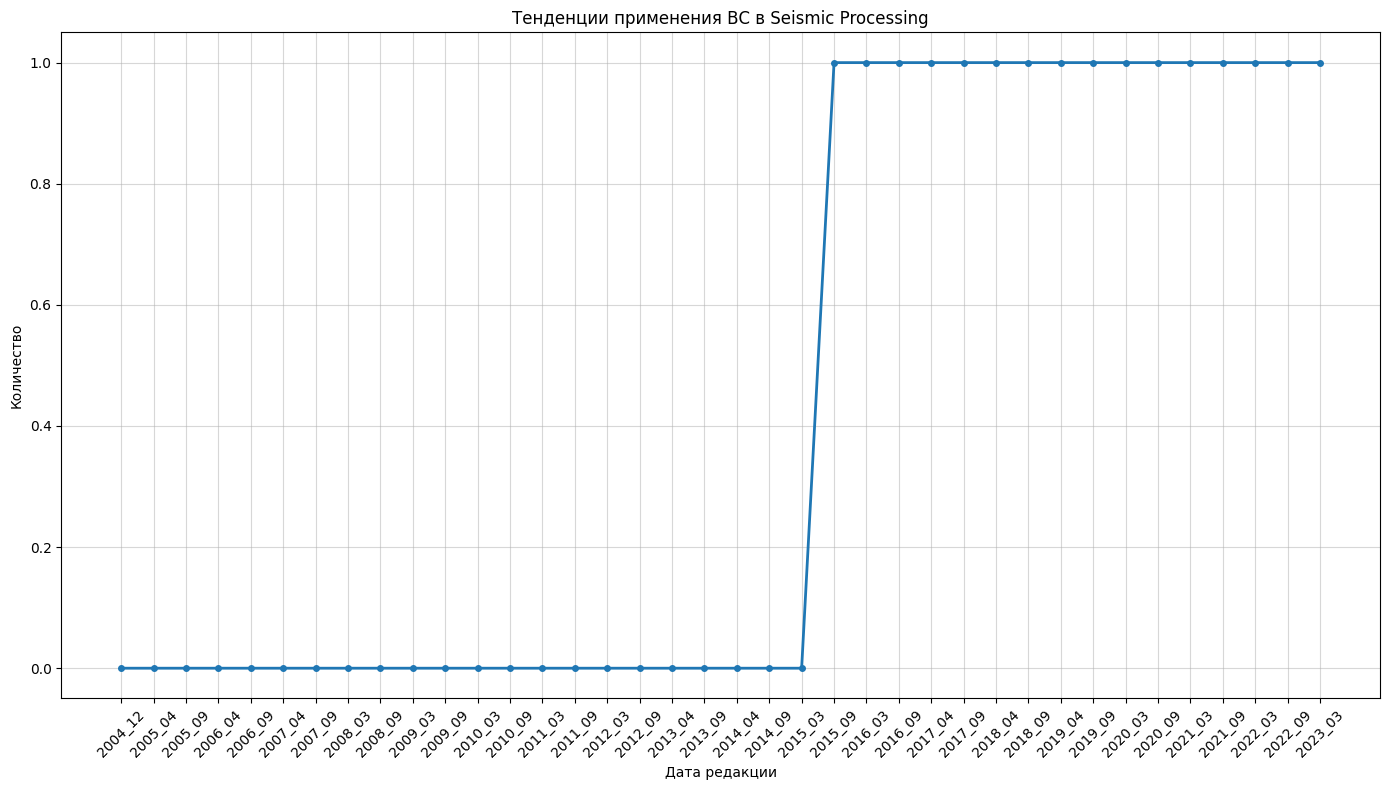

<Figure size 640x480 with 0 Axes>

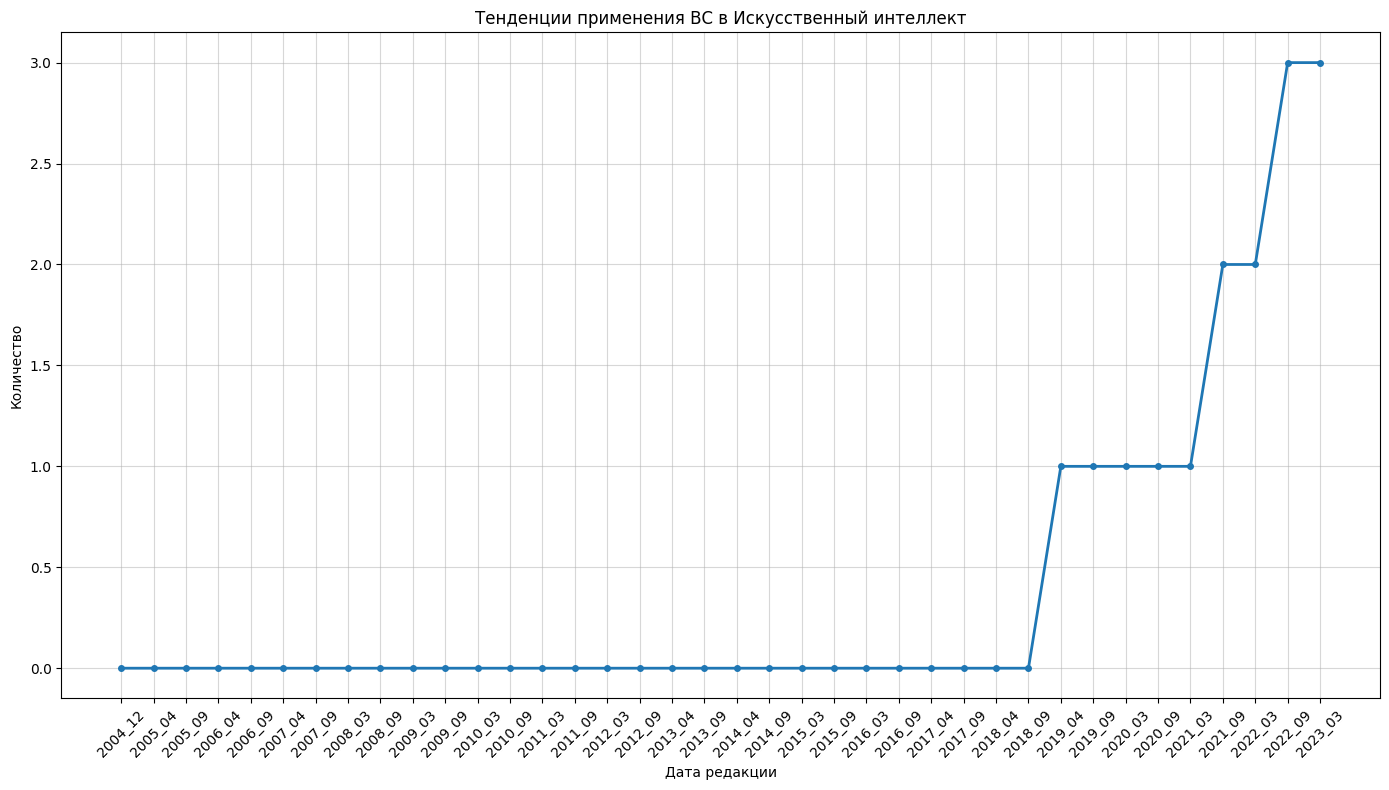

<Figure size 640x480 with 0 Axes>

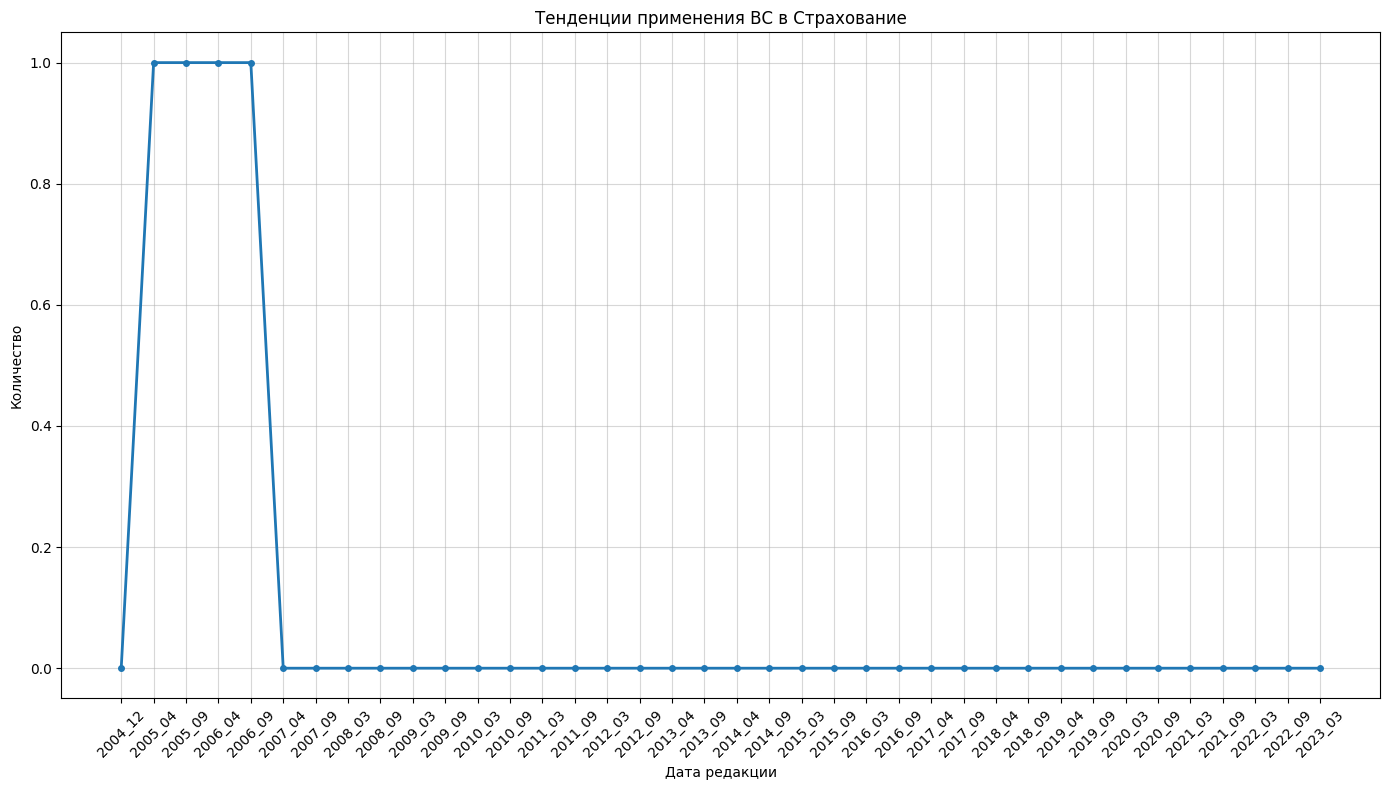

<Figure size 640x480 with 0 Axes>

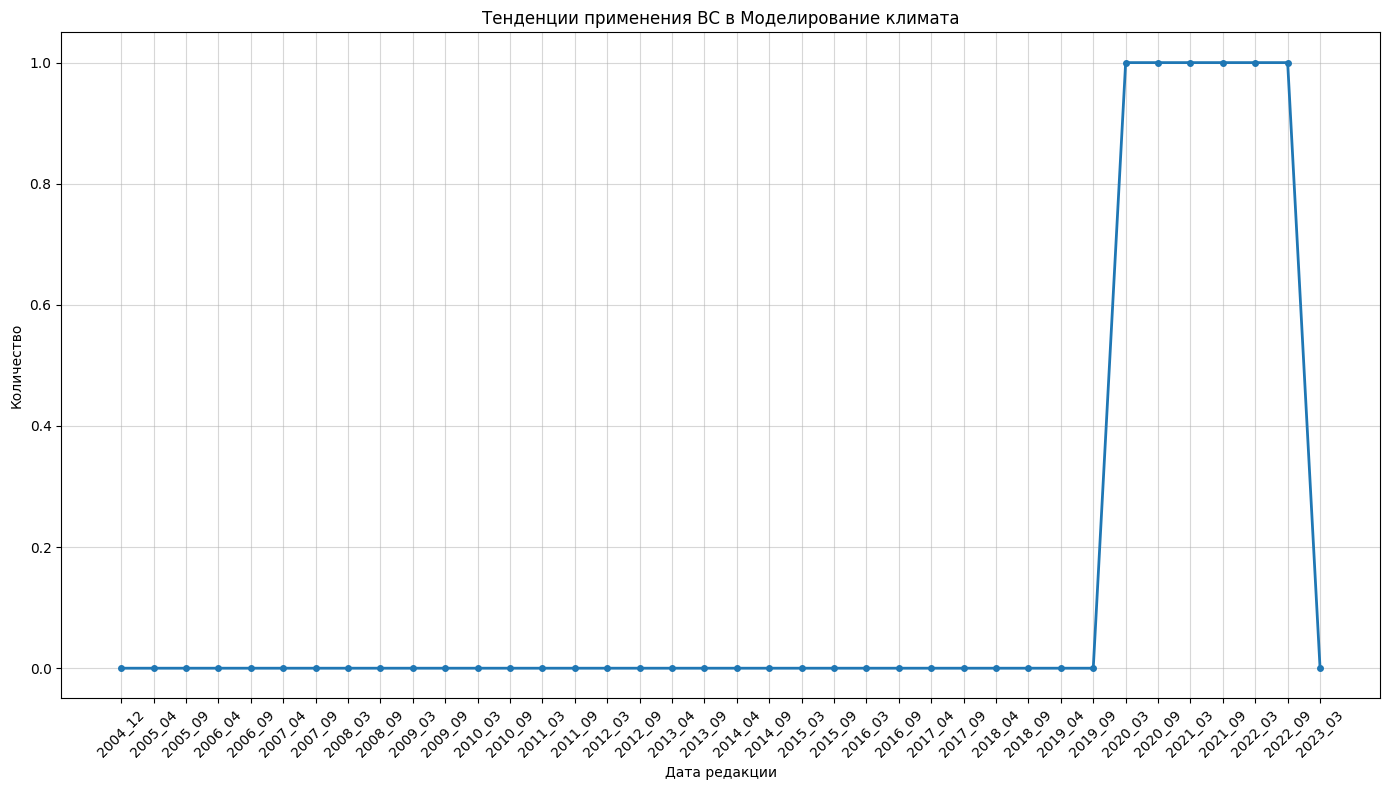

<Figure size 640x480 with 0 Axes>

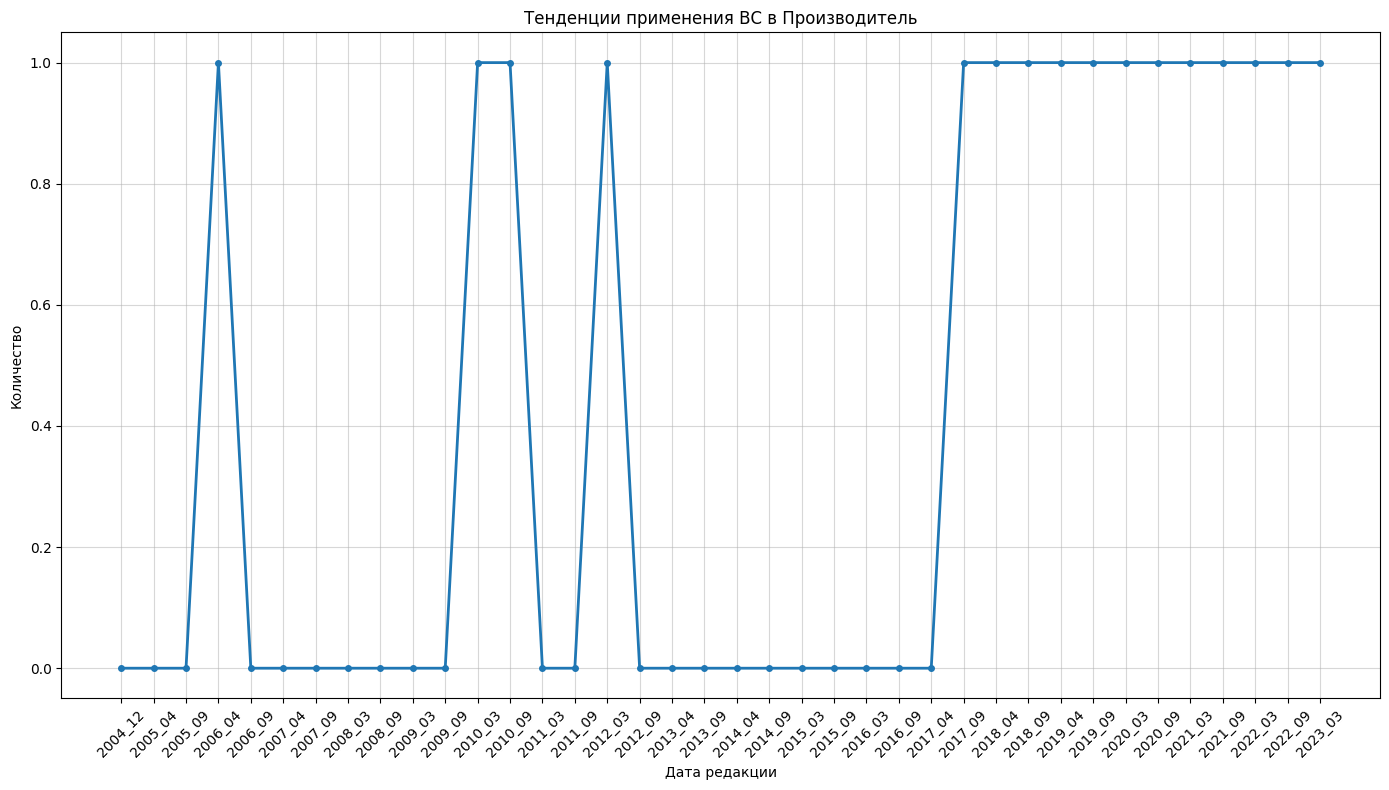

<Figure size 640x480 with 0 Axes>

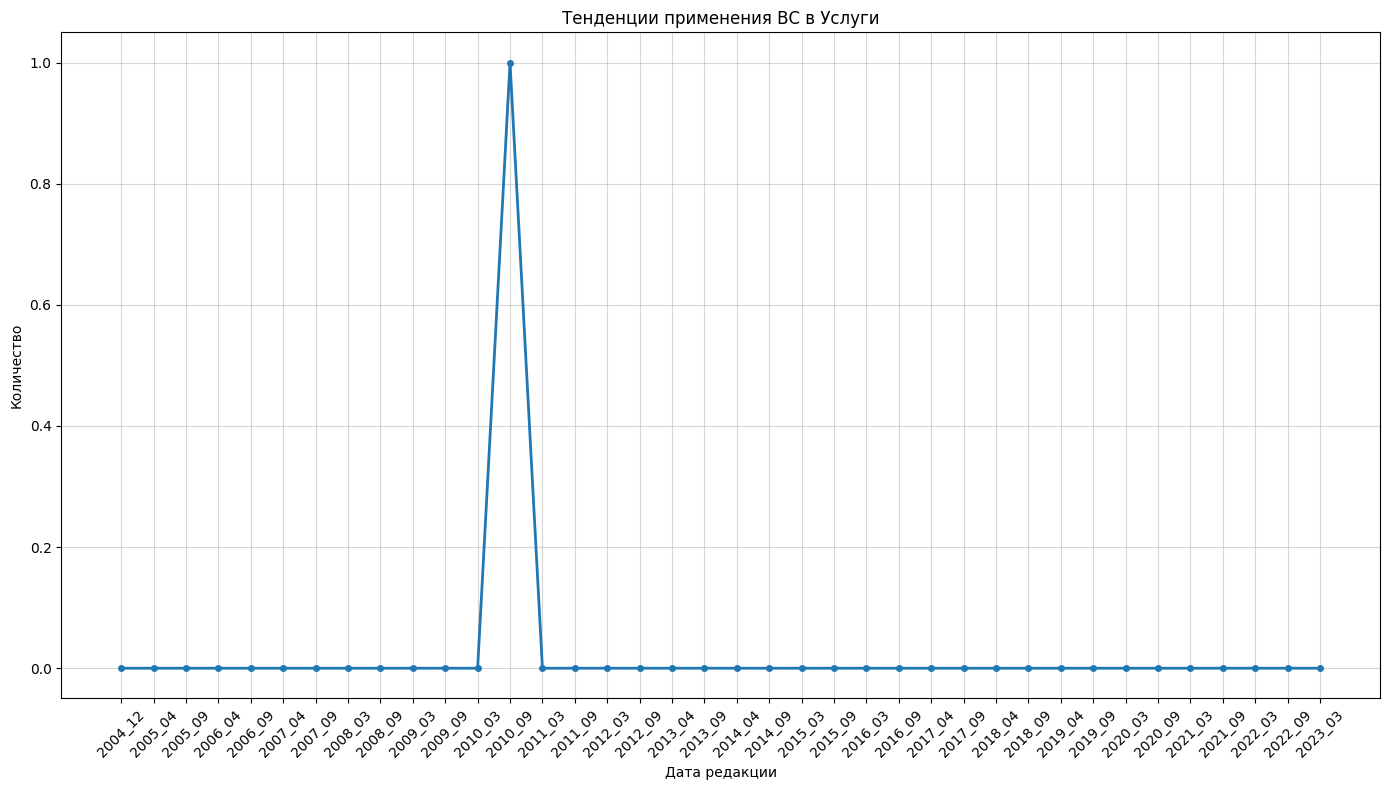

<Figure size 640x480 with 0 Axes>

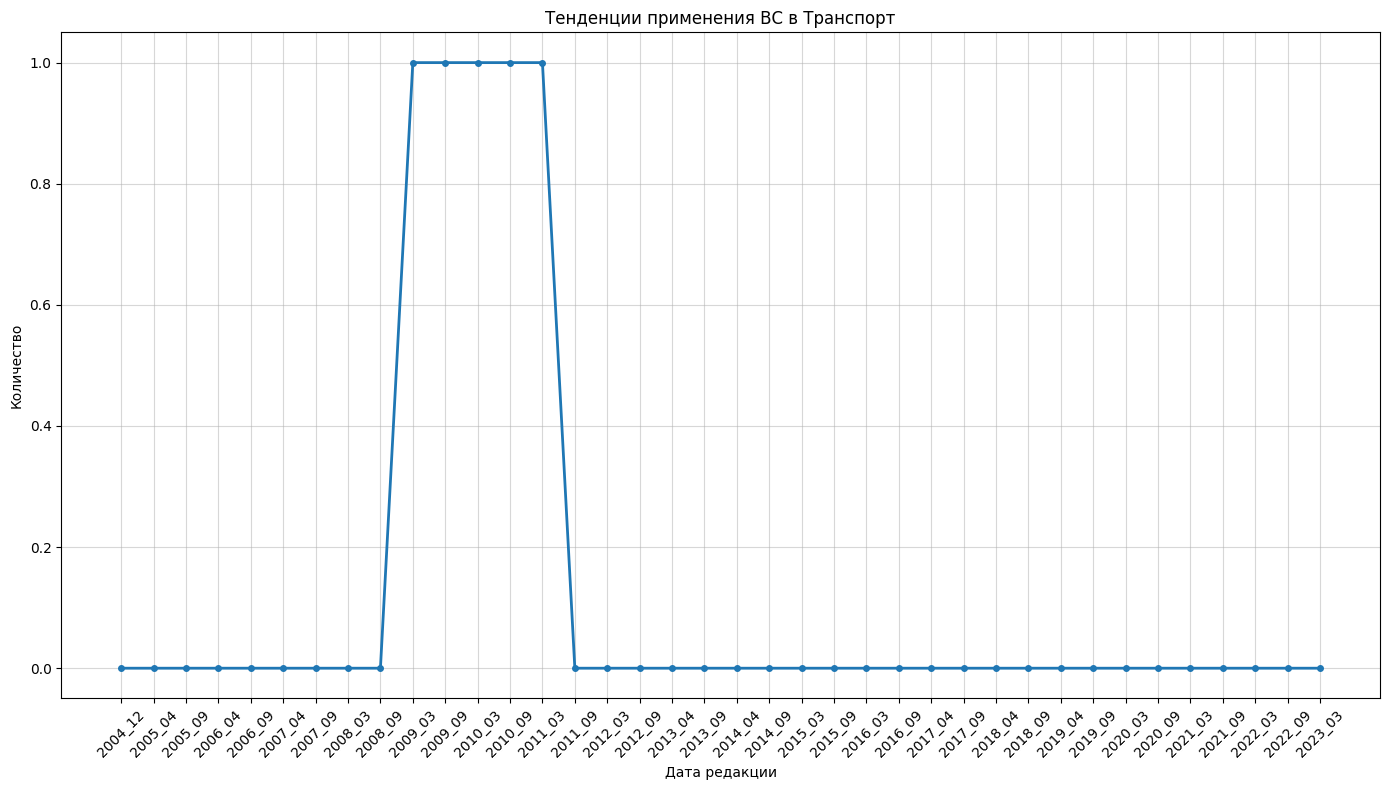

<Figure size 640x480 with 0 Axes>

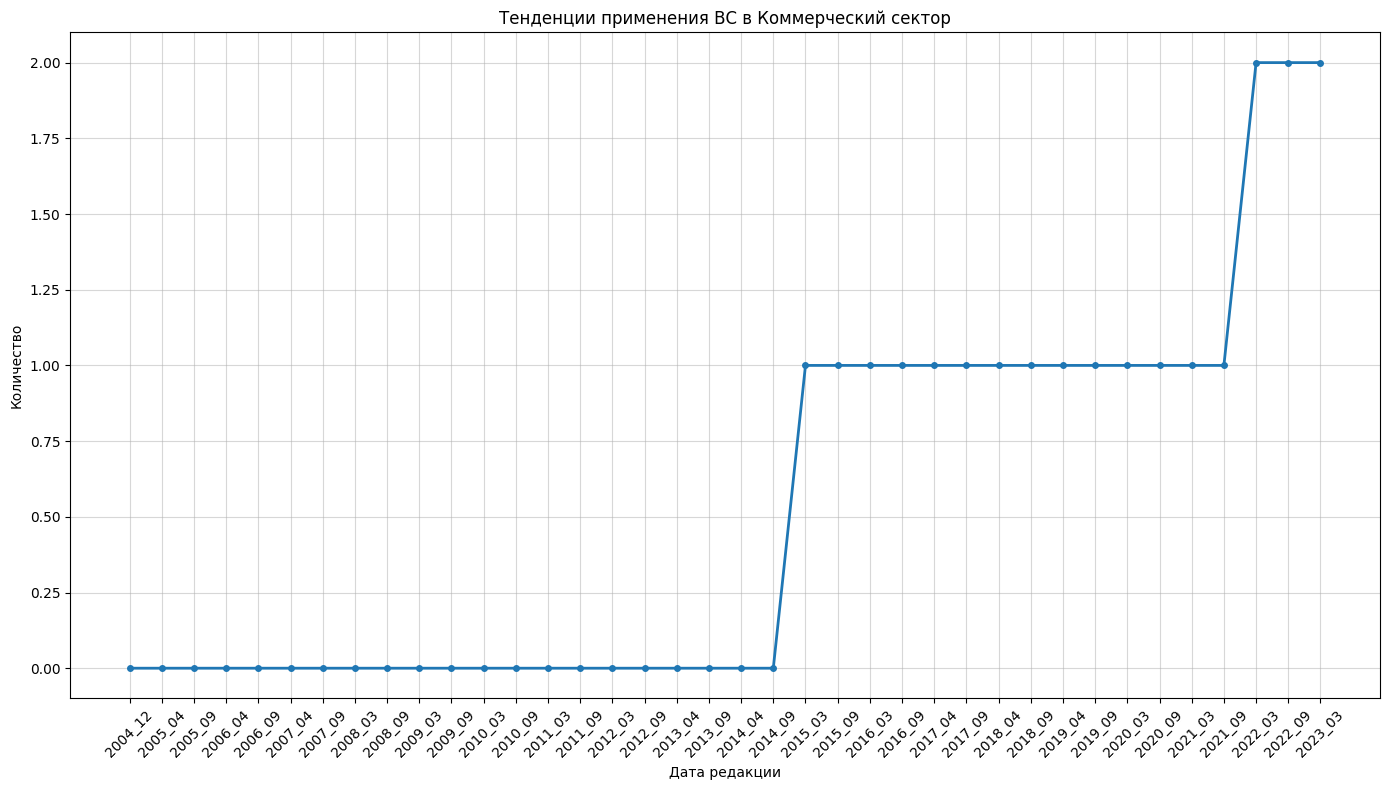

<Figure size 640x480 with 0 Axes>

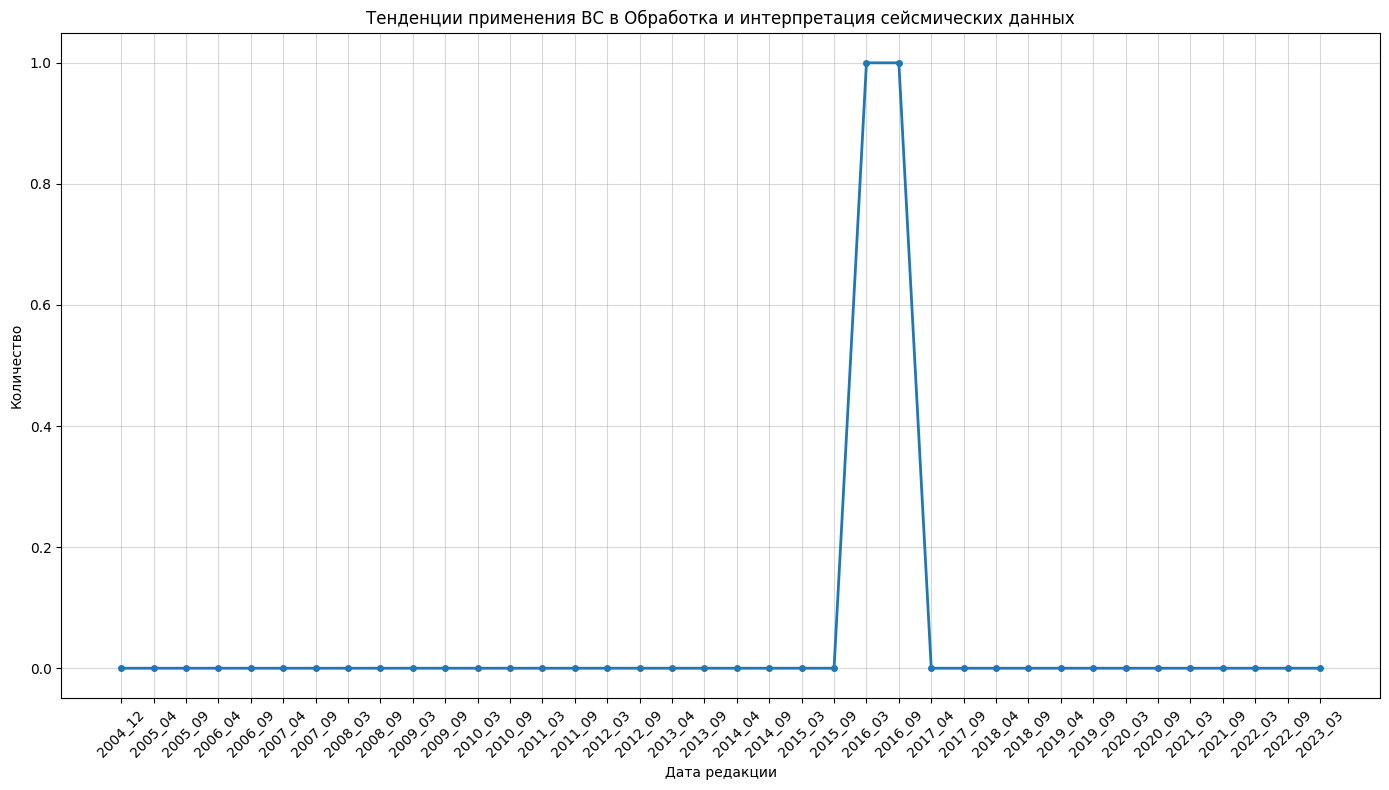

<Figure size 640x480 with 0 Axes>

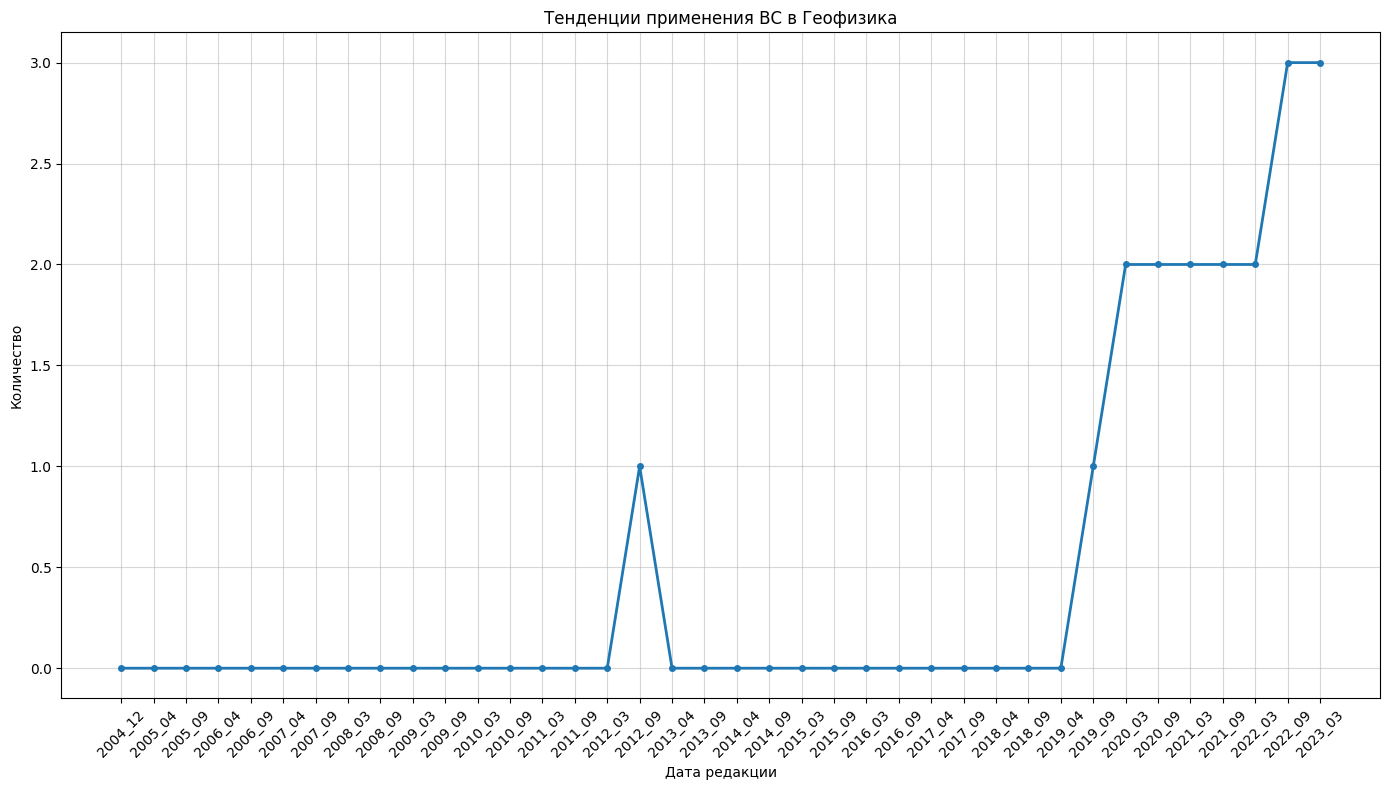

<Figure size 640x480 with 0 Axes>

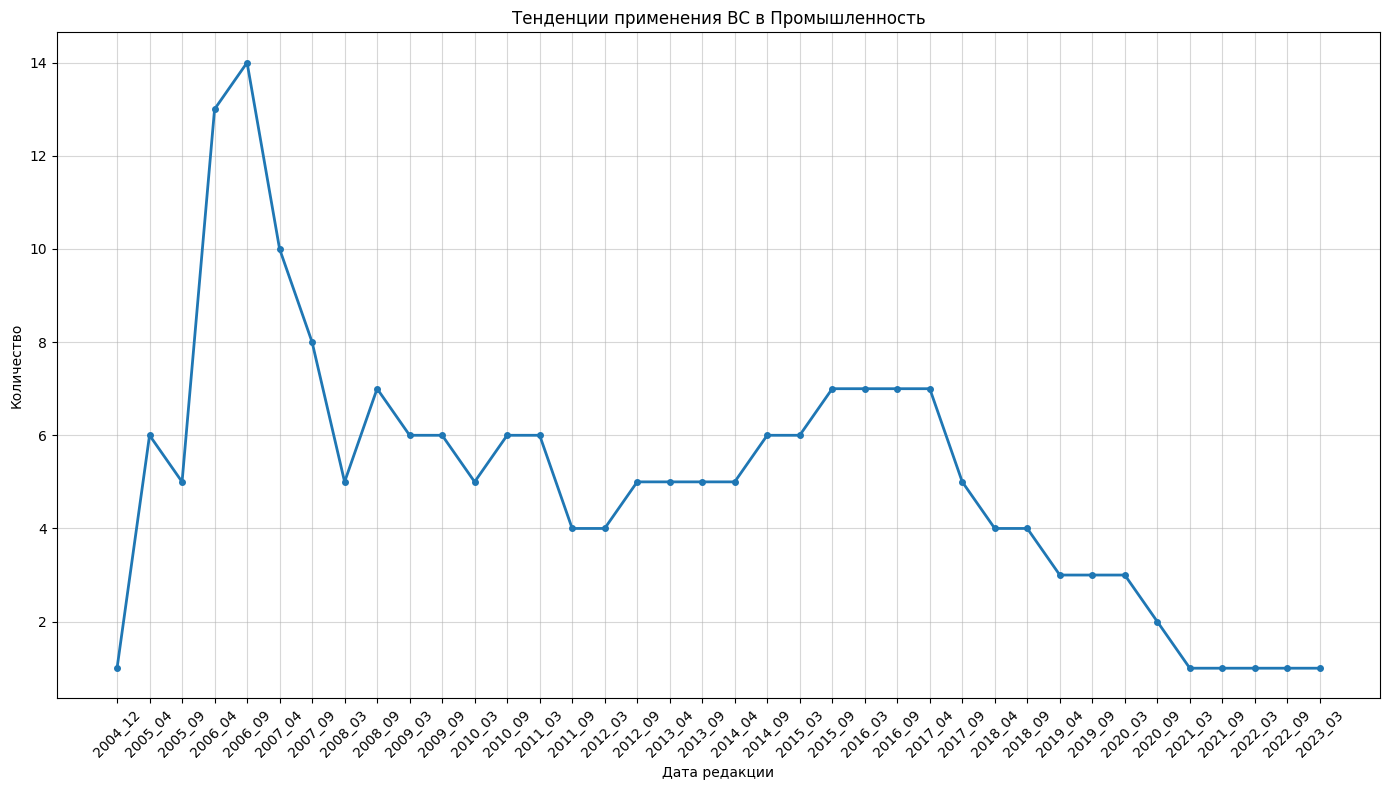

<Figure size 640x480 with 0 Axes>

In [55]:
for area, area_df in trend_dfs.items():
    fig, ax = plt.subplots(figsize=(14,8))
    ax.plot(area_df["Date"], area_df["Count"], marker="o", linewidth=2, markersize=4)
    ax.set_title(f"Тенденции применения ВС в {area}")
    ax.set_ylabel(f"Количество")
    ax.set_xlabel(f"Дата редакции")
    ax.grid(True, alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    out_dir = "plots"
    os.makedirs(out_dir, exist_ok=True)
    filename = f"{out_dir}/Тренд_{area}.png"
    plt.savefig(filename, dpi=300)
    plt.close(fig)